# Project: Wrangling and Analyze Data

## 1. Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [4]:
df_img = pd.read_csv('image-predictions.tsv', sep = '\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# NOTE TO REVIEWER: I've tried to access the data by using twitter API, but it failed with each tweet_id.
# Maybe it's because in Russia we have limited access to the Twitter. I can get access to Twitter's developer portal by VPN, 
# but I got "Fail" on every twitter_id
# That's why I just downloaded tweet_json.txt file and uploaded it in the project's folder

#from timeit import default_timer as timer

#Twitter API keys were deleted
#consumer_key = '------'
#consumer_secret = '-----'
#access_token = '------'
#access_secret = '------'

#Authentication 
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#tweet_ids = df_arch.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [6]:
#Read tweet_json.txt file into DataFrame
df_tw = pd.read_json('tweet_json.txt', lines = True)

df_tw = df_tw[['id_str', 'favorite_count', 'retweet_count']]
df_tw = df_tw.rename(columns={'id_str': 'tweet_id'})
df_tw.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336192,39467,8853
1,892177421306343424,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


At last 3 data sets:
- df_arch from twitter-archive-enhanced.csv
- df_img from image-predictions.tsv
- df_tw from tweet_json.txt

## 2. Assessing Data


### 2.1 Visual assessment

In [7]:
df_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,None,pupper,None
615,796563435802726400,NaN,NaN,2016-11-10 04:01:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I want to finally rate this ico...,7.809316e+17,4.196984e+09,2016-09-28 00:46:20 +0000,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo
299,836989968035819520,NaN,NaN,2017-03-01 17:22:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mookie. He really enjoys shopping but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836989968...,12,10,Mookie,None,None,None,None
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None
1573,687494652870668288,NaN,NaN,2016-01-14 04:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marq. He stole this car. 7/10 wtf Marq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687494652...,7,10,Marq,None,None,None,None
314,835172783151792128,NaN,NaN,2017-02-24 17:01:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835172783...,12,10,None,None,None,None,None
1149,726828223124897792,NaN,NaN,2016-05-01 17:38:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloop. He's a Phoenician Winnebago. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726828223...,12,10,Bloop,None,None,None,None
1318,706538006853918722,NaN,NaN,2016-03-06 17:52:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Oliver (pronounced ""Ricardo""). He's a ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/706538006...,11,10,Oliver,None,None,None,None


In [8]:
df_img.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True
2036,884441805382717440,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
429,674265582246694913,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False
1795,831315979191906304,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,briard,0.982755,True,soft-coated_wheaten_terrier,0.009084,True,Bouvier_des_Flandres,0.004693,True
922,702217446468493312,https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg,1,golden_retriever,0.242419,True,chow,0.226800,True,cocker_spaniel,0.194086,True
477,675166823650848770,https://pbs.twimg.com/media/CV6spB7XAAIpMyP.jpg,1,llama,0.284394,False,standard_poodle,0.132569,True,teddy,0.127975,False
806,691820333922455552,https://pbs.twimg.com/media/CZnW7JGW0AA83mn.jpg,1,minivan,0.332756,False,sports_car,0.129452,False,limousine,0.073936,False
533,676897532954456065,https://pbs.twimg.com/media/CWTSt0UW4AALMNB.jpg,1,hamster,0.628255,False,guinea_pig,0.318646,False,macaque,0.013058,False


In [9]:
df_tw.sample(10)

,tweet_id,favorite_count,retweet_count
735,780931614150983680,24192,8536
802,772152991789019136,4181,1300
1934,673956914389192704,2091,1069
2311,666739327293083648,244,71
253,844580511645339648,17871,3533
1802,676946864479084544,1844,426
1733,679729593985699840,2367,937
582,800188575492947968,0,4581
491,813217897535406080,20783,8476
525,808838249661788160,11271,3536


From the visual assessment we can see several issues:

df_arch:
1. In Name column some dogs doesn't have a name or have name 'a' (maybe some others not appropriate names, need to check with value_counts method).
2. The source column has HTML tags.
3. The last 4 columns has same 4 variables (dogoo, floofer, pupper, puppo)

df_img:
1. Columns p1, p2, p3 in dog's breed we see both lowercase names or starting with capital letters.

Also we see that df_img and df_tw could be merged with df_arch by tweet_id, because they are the part of the same data from the df_arch (info about dog ratings)

### 2.2 Programmatic assessment

In [10]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
df_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
df_arch.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Toby           7
Bailey         7
Daisy          7
Buddy          7
Koda           6
Milo           6
Dave           6
Bella          6
Jax            6
Leo            6
Stanley        6
Oscar          6
Rusty          6
Scout          6
Jack           6
Gus            5
            ... 
Edmund         1
Grizzwald      1
Jiminus        1
Mookie         1
Carter         1
Heinrich       1
Zeek           1
Anthony        1
Champ          1
Bilbo          1
Gabby          1
Lilli          1
Stewie         1
Rodney         1
Kody           1
Richie         1
Hazel          1
Finnegus       1
Duchess        1
Bayley         1
Ricky          1
Perry          1
Berkeley       1
Diogi          1
Opie           1
Crawford       1
Craig          1
Donny         

In [15]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df_tw.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [19]:
df_img.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [20]:
list(df_arch.text)[:10]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps:

In [21]:
# Let's check for duplicates
print (sum(df_arch.tweet_id.duplicated()))
print (sum(df_img.tweet_id.duplicated()))
print (sum(df_tw.tweet_id.duplicated()))
print (sum(df_img.jpg_url.duplicated()))

0
0
0
66


1. Using info method we see that:

-- tweet_id is int in all tables but despite that it has only numers it is better to be string type (like index in address)

-- timestamp and retweeted_status_timestamp columns is an object type, and ratings are int 64 (has to be float, as we see in text columns ratings like "9.75/10")

-- there ara 181 retweets, so data contains duplicate tweets

-- in df_img is only 2075 tweet_id so some tweets in df_arch has no images

2. Using describe method we can mention that ratings (numerator and denominator) is >0 and <1776
3. Using value_counts method we see that a column 'name' has several strange names like: 'an', 'the', 'unacceptable' 
4. If we look in text column we see hyperlinks
5. In df_img we see 66 duplicates of image's URL

### Quality issues
The four main data quality dimensions are:

- Completeness: missing data?
- Validity: does the data make sense?
- Accuracy: inaccurate data? 
- Consistency: standardization?


1. all tables: tweet_id is int64 format and has to be string 

2. df_arch['name']: Invalid names of dogs

3. df_arch['source']: Has HTML tags, URL info and source info

4. df_arch['text']: Has URL information in text description

5. df_img: Dog's breed by standart

6. df_arch: convert to date columns (timestamp, retweeted_status_timestamp)

7. df_arch: the duplicates for one dog because of retweets

8. df_img: Duplicated images

9. df_arch: Rating_denominator sometimes is not 10. Ratings numerator has several outliers (like 1776)

### Tidiness issues

Three requirements for tidiness:

- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table


10. df_arch: 4 last columns contains categorical variables and can be combined

11. Merging df_arch, df_tw and df_img into one table by tweet_id

## Cleaning Data


In [22]:
# Make copies of original pieces of data
df_arch_clean = df_arch.copy()
df_tw_clean = df_tw.copy()
df_img_clean = df_img.copy()

### Issue #1:
All tables: tweet_id is int64 format and has to be string 

#### Define: 
Сonvert tweet_id into string

#### Code

In [23]:
df_arch_clean['tweet_id'] = df_arch_clean['tweet_id'].astype(str)
df_tw_clean['tweet_id'] = df_tw_clean['tweet_id'].astype(str)
df_img_clean['tweet_id'] = df_img_clean['tweet_id'].astype(str)

#### Test

In [24]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #2:
df_arch['name']: Invalid names of dogs

#### Define
We see that invalid names written in lowercase. Get the dictionary of not standart names and then change it to "None"

#### Code

In [25]:
#Make a dictionary of invalid dogs names
bad_names = []
for dog_name in df_arch_clean.name:
    if dog_name.islower():
        bad_names.append(dog_name)
        
bad_names = list(set(bad_names))
print(bad_names)

['life', 'very', 'actually', 'this', 'one', 'by', 'just', 'incredibly', 'old', 'his', 'such', 'not', 'space', 'infuriating', 'unacceptable', 'light', 'the', 'mad', 'officially', 'my', 'all', 'getting', 'a', 'quite', 'an']


In [26]:
#Change name to None
for dog_name in bad_names:
    df_arch_clean.name.replace(dog_name, "None", inplace = True)

#### Test

In [27]:
#check the data set
sum(df_arch_clean.name.isin(bad_names))

0

### Issue #3:
df_arch['source']: Has HTML tags, URL info and source info

#### Define
Remove HTML tags, split info in two columns: source and URL

#### Code

In [28]:
# cut and store the source info and its URL. Change the source column, add the source_URL column
source = []
source_url = []

for index in df_arch_clean.source:
    source.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[1])
    source_url.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[0])
    
df_arch_clean.source = source
df_arch_clean = pd.concat([df_arch_clean, pd.DataFrame(source_url, columns = ['source_url'])], axis = 1)

#### Test

In [29]:
df_arch_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone


### Issue #4:
df_arch['text']: Has URL information in text description

#### Define
Split info in two columns: text and text_URL

#### Code

In [30]:
text= []
text_url = []

for index in df_arch_clean.text:
    text.append(' '.join(index.split(" ")[:-1]))
    text_url.append(index.split(" ")[-1])

df_arch_clean.text = text
df_arch_clean = pd.concat([df_arch_clean, pd.DataFrame(text_url, columns = ['text_url'])], axis = 1)

#### Test

In [31]:
df_arch_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,text_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone,https://t.co/MgUWQ76dJU


In [32]:
list(df_arch_clean.text)[:5]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek']

### Issue #5:
df_img: Dog's breed by standart


#### Define
For this project we will make a standart for dog's breed: all names in lower cases


#### Code

In [33]:
def lower_name(breed):
    breed = list(map(lambda x : x.lower(), breed ))
    return breed

In [34]:
df_img_clean.p1 = lower_name(df_img_clean.p1)
df_img_clean.p2 = lower_name(df_img_clean.p2)
df_img_clean.p3 = lower_name(df_img_clean.p3)

#### Test

In [35]:
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #6:
df_arch: convert to date columns (timestamp, retweeted_status_timestamp)

#### Define
change data type of columns to datatime type

#### Code

In [36]:
df_arch_clean['timestamp'] = pd.to_datetime(df_arch_clean['timestamp'])
df_arch_clean['retweeted_status_timestamp'] = pd.to_datetime(df_arch_clean['retweeted_status_timestamp'])

#### Test

In [37]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
source_url     

### Issue #7:
df_arch: the duplicates for one dog because of retweets

#### Define
Remove duplicate tweets by checking retweeted_status_id

#### Code

In [38]:
df_arch_clean.shape[0]

2356

In [39]:
df_arch_clean = df_arch_clean[df_arch_clean.retweeted_status_id.isnull() == True]

#### Test
With 181 of reteets the clean data set has to be 2356 - 181 = 2175 size

In [40]:
df_arch_clean.shape[0]

2175

### Issue #8:
df_img: Duplicated images

#### Define
Remove duplicate images

#### Code

In [41]:
dupl_url = df_img_clean.jpg_url.duplicated()
index = np.logical_not(dupl_url)
df_img_clean = df_img_clean[index]

#### Test

In [42]:
print (sum(df_img_clean.jpg_url.duplicated()))

0


### Issue #9:
df_arch: Rating_denominator sometimes is not 10. Ratings numerator has several outliers (like 1776)

#### Define
1. Convert ratings columns type into float
2. Look for correct ratings in text
3. Check and deal with the ouliers in numerator
4. Create new column 'rating' with relative value of rating

#### Code

In [43]:
#Convert ratings columns type into float
df_arch_clean['rating_numerator'] = df_arch_clean['rating_numerator'].astype(float)
df_arch_clean['rating_denominator'] = df_arch_clean['rating_denominator'].astype(float)

In [44]:
# Find tweets with decimal in numerator rating
import re

r_text = []
r_index = []
rating = []

for index, text in df_arch_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        r_text.append(text)
        r_index.append(index)
        rating.append(re.search('\d+\.\d+', text).group())

print(r_text)
print(r_index)
print(rating)

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10', "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10", "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back", "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a", 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10']
[45, 695, 763, 1689, 1712]
['13.5', '9.75', '11.27', '9.5', '11.26']


In [45]:
#Changing incorrect ratings to correct from the text info
df_arch_clean.loc[r_index[0], 'rating_numerator'] = float(rating[0])
df_arch_clean.loc[r_index[1], 'rating_numerator'] = float(rating[1])
df_arch_clean.loc[r_index[2], 'rating_numerator'] = float(rating[2])
df_arch_clean.loc[r_index[3], 'rating_numerator'] = float(rating[3])
df_arch_clean.loc[r_index[4], 'rating_numerator'] = float(rating[4])

In [46]:
# Finding the outliers with rating >14
outliers = sorted(df_arch_clean.query('rating_numerator > 14').rating_numerator.tolist())

df_arch_clean[df_arch_clean.rating_numerator.isin(outliers)][['tweet_id','text','rating_numerator']]

,tweet_id,text,rating_numerator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,17.0
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,420.0
189,855860136149123072,@s8n You tried very hard to portray this good ...,666.0
290,838150277551247360,@markhoppus,182.0
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking fo...,15.0
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960.0
433,820690176645140481,The floofs have been released I repeat the flo...,84.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0
902,758467244762497024,Why does this never happen at my front door......,165.0
979,749981277374128128,This is Atticus. He's quite simply America af....,1776.0


In [47]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
source_url       

In [48]:
# Remove tweets with definite outliers. Save their tweet_ids in case
id_remove = ['855862651834028034',
             '855860136149123072',
             '838150277551247360',
             '835246439529840640',
             '749981277374128128',
             '731156023742988288',
             '684225744407494656',
             '684222868335505415',
             '670842764863651840',
             '810984652412424192']

index_r = np.logical_not(df_arch_clean.tweet_id.isin(id_remove))
df_arch_clean = df_arch_clean[index_r]

In [49]:
# Create a new column 'rating' as relative value of rating
df_arch_clean['rating'] = df_arch_clean['rating_numerator'] / df_arch_clean['rating_denominator']

#### Test

In [50]:
df_arch_clean.rating.value_counts()

1.200000    503
1.000000    444
1.100000    429
1.300000    307
0.900000    156
0.800000     98
0.700000     53
1.400000     43
0.500000     35
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      7
0.000000      2
1.500000      1
1.250000      1
0.950000      1
0.975000      1
1.126000      1
0.636364      1
1.127000      1
1.350000      1
0.818182      1
1.700000      1
0.733333      1
Name: rating, dtype: int64

In [51]:
df_arch_clean.loc[695]

tweet_id                                                     786709082849828864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-10-13 23:23:56
source                                                       Twitter for iPhone
text                          This is Logan, the Chow who lived. He solemnly...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaT
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                           9.75
rating_denominator                                                           10
name                                    

### Issue #10:

df_arch: 4 last columns contains categorical variables and can be combined

#### Define
1. Make a new column of dogs types
2. Append the new column to data set

#### Code

In [52]:
dogs = df_arch_clean[['doggo','floofer','pupper','puppo']]

#Clear the None in column
dogs = dogs.replace('None', '')

dogs_dict = np.array(dogs['doggo']) + np.array(dogs['floofer']) + np.array(dogs['pupper']) + np.array(dogs['puppo'])

In [53]:
from collections import Counter
c = Counter(dogs_dict) 
print(c)

Counter({'': 1821, 'pupper': 224, 'doggo': 75, 'puppo': 24, 'doggopupper': 10, 'floofer': 9, 'doggopuppo': 1, 'doggofloofer': 1})


From above we see, that several dogs are classified twice. Let's change them into new class "mutant"

In [54]:
dogs_dict[dogs_dict == 'doggopupper'] = 'mutant'
dogs_dict[dogs_dict == 'doggopuppo'] = 'mutant'
dogs_dict[dogs_dict == 'doggofloofer'] = 'mutant'

from collections import Counter
c = Counter(dogs_dict) 
print(c)

Counter({'': 1821, 'pupper': 224, 'doggo': 75, 'puppo': 24, 'mutant': 12, 'floofer': 9})


In [55]:
#Append dogs_dict to df_arch_clean (reset inde first)
df_arch_clean.reset_index(drop=True, inplace=True)
df_arch_clean = pd.concat([df_arch_clean, pd.DataFrame(dogs_dict, columns = ['dogs_dictionary'])], axis=1)

#Delete 4 columns
df_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [56]:
df_arch_clean.dogs_dictionary.value_counts()

           1821
pupper      224
doggo        75
puppo        24
mutant       12
floofer       9
Name: dogs_dictionary, dtype: int64

### Issue #11:
Merging df_arch, df_tw and df_img into one table by tweet_id

#### Define
Merge 3 data frames using 'tweet_id' as a Key

#### Code

In [57]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [58]:
df = pd.merge(df_arch_clean, df_tw_clean, how = 'inner', on = 'tweet_id')
df = pd.merge(df, df_img_clean, how = 'inner', on = 'tweet_id')
df.reset_index(drop=True, inplace=True)

#### Test

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 30 columns):
tweet_id                      1295 non-null object
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1295 non-null datetime64[ns]
source                        1295 non-null object
text                          1295 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1295 non-null object
rating_numerator              1295 non-null float64
rating_denominator            1295 non-null float64
name                          1295 non-null object
source_url                    1295 non-null object
text_url                      1295 non-null object
rating                        1295 non-null float64
dogs_dictionary               1295 non-null object
favorite_count  

#### That's look very strange that so many tweet_id in archive do not match to tweet_json.txt. 
#### I suppose that if I could use the Twitter API it would be much more matches

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data


In [61]:
# Create new data frame from cleaned data of twitter_archive
df_new = pd.read_csv('twitter_archive_master.csv')

In [62]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 31 columns):
Unnamed: 0                    1295 non-null int64
tweet_id                      1295 non-null int64
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1295 non-null object
source                        1295 non-null object
text                          1295 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1295 non-null object
rating_numerator              1295 non-null float64
rating_denominator            1295 non-null float64
name                          1295 non-null object
source_url                    1295 non-null object
text_url                      1295 non-null object
rating                        1295 non-null float64
dogs_dictionary               204

### Insights:
1. Most popular dog breed and dog name

2. Most common rating

3. Most popular dogs (most favorite & retweeted)

Text(0,0.5,'dog breed')

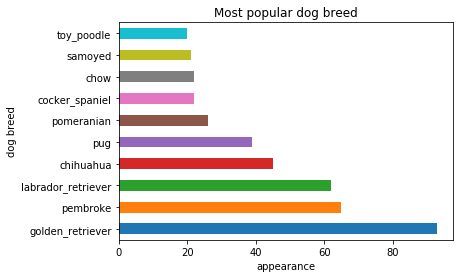

In [63]:
# 1. Looking for most popular dog breed 
dog_breed = df_new.groupby('p1').filter(lambda x: len(x) >= 20)
dog_breed['p1'].value_counts().plot(kind = 'barh')
plt.title ('Most popular dog breed')
plt.xlabel('appearance')
plt.ylabel('dog breed')

In [64]:
# Most popular dog name
df_new.name.value_counts()[0:5]

None       435
Oliver       8
Tucker       7
Winston      7
Penny        6
Name: name, dtype: int64

##### Conclusion 1. The most common dog breed is Golden Retriever and dog name - Oliver 

In [65]:
# 2. Most common rating
c_rating = df_new['rating'].value_counts()
c_rating

1.000    304
1.200    290
1.100    252
1.300    157
0.900     97
0.800     64
0.700     35
0.600     22
0.500     19
1.400     18
0.300     13
0.400     12
0.200      6
0.100      3
1.127      1
1.350      1
0.975      1
Name: rating, dtype: int64

Text(0,0.5,'Appearance')

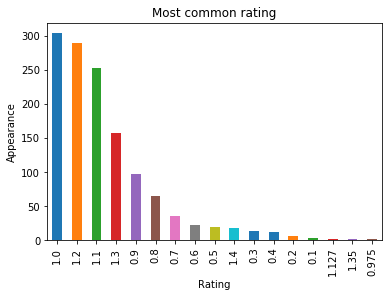

In [71]:
c_rating.plot(kind = 'bar')
plt.title ('Most common rating')
plt.xlabel('Rating')
plt.ylabel('Appearance')

##### Conclusion 2. The most common rating is 10/10 (as expected), but the love to puppies is so big that 12/10 and 11/10 is also often occurs

In [73]:
# 3.1 Looking for most retweeted tweet
goat1 = df_new[df_new['retweet_count'] == df_new['retweet_count'].max()]
goat1

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
231,231,807106840509214720,NaN,NaN,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,...,1,chihuahua,0.50537,True,pomeranian,0.120358,True,toy_terrier,0.077008,True


In [67]:
# 3.2 Looking for most favorite tweet
goat2 = df_new[df_new['favorite_count'] == df_new['favorite_count'].max()]
goat2

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
231,231,807106840509214720,NaN,NaN,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,...,1,chihuahua,0.50537,True,pomeranian,0.120358,True,toy_terrier,0.077008,True


In [68]:
goat2.name

231    Stephan
Name: name, dtype: object

##### Conclusion 3. The most popular dog is Stephan (tweet_id = 807106840509214720)

### Visualization

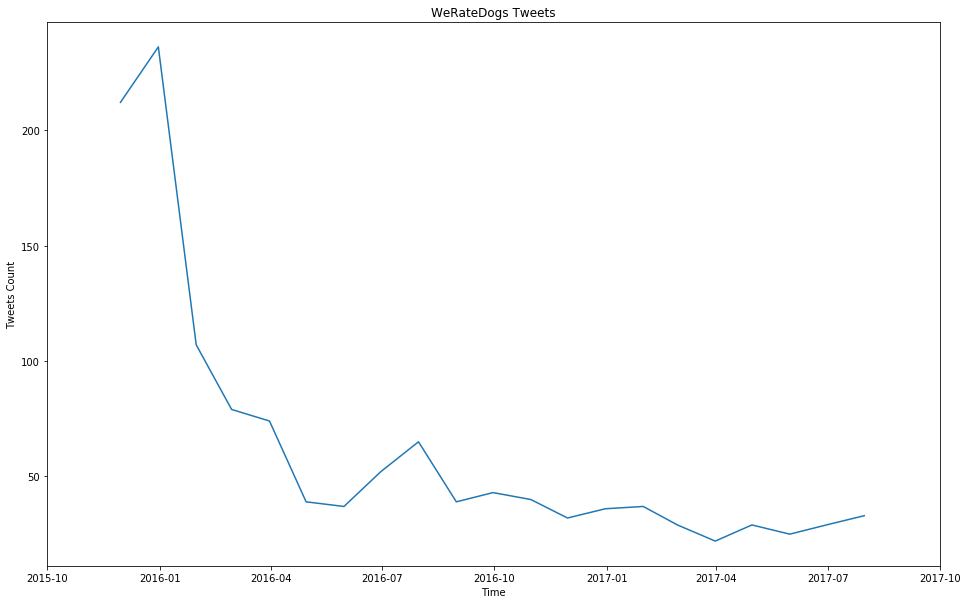

In [74]:
# Let's see the tweeting activity 
df_new.timestamp = pd.to_datetime(df_new['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = df_new.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]

plt.figure(figsize=(16,10))
plt.xlim([datetime.date(2015, 10, 1), datetime.date(2017, 10, 1)])
plt.xlabel('Time')
plt.ylabel('Tweets Count')
plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets');

#### From the plot above we see that at first when the tweeter start collect puppies the activity was 4 time bigger after several months. But after that the activity is just slightly decreasing and we can say about loyal subscribers